## Customer Segmentation Project
### In this project, I will try to figure out who the best customers are. I will look at the data in the following ways to answer that question:
#### 1. Explore the general distribution of the data to get a sense of Male vs. Female customers, and how their income, age, and spending scores are similar or different.
#### 2. Explore which gender has a higher income.
#### 3. Explore which geneder has a higher average spending score.
#### 4. Based on these results, see which is more likely to affect spending score: gender, age, annual income, or a combination of the three.
#### Based on these results, I will run a K-Means Clustering or KNN algorithm to see what customer segments exist.

## Preparation

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [14]:
# Check to see 
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### From calling describe, we can see that there are no values to clean. Age looks pretty normally distributed, annual income in the thousands doesn't have outliers that are too excessive. Spending score is in fact between 1 and 100. Everything looks good.

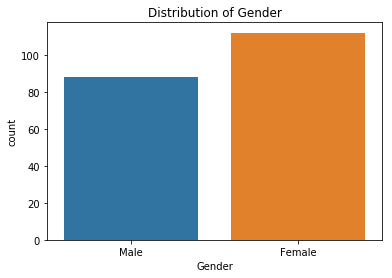

In [23]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=customers);
plt.title('Distribution of Gender');

There are more women than men in this dataset.

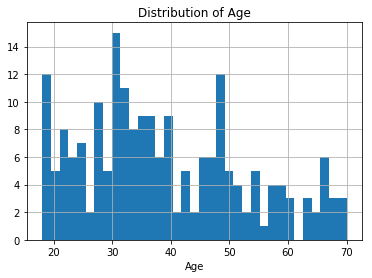

In [25]:
customers.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

#### Age histogram is somewhat right-tailed. We saw that the average age was 38 as well, so this is not surprising, with a spike in ages 48-49 and 65 as well.

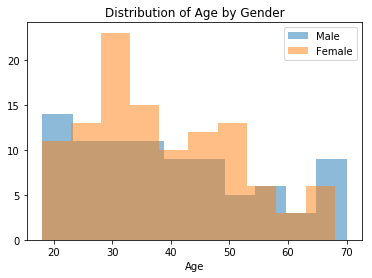

In [43]:
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

### We can see two things here, one reflected earlier in the describe call:

#### 1. There are more women than men in this data set.

#### 2. There are a lot of younger women and middle-aged women, and thus more older men.

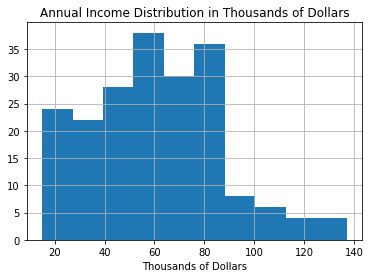

In [51]:
customers.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

#### The most frequent annual incomes are between around 50 and 85,000.

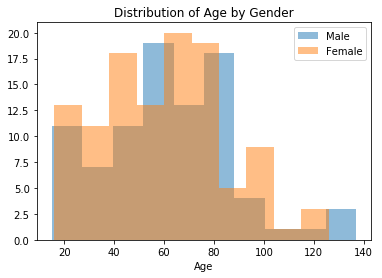

In [52]:
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

#### Women generally had lower income than men, the majority falling between 45 and 80,000.

In [54]:
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

In [61]:
male_customers['Spending Score (1-100)'].mean()

48.51136363636363

In [62]:
female_customers['Spending Score (1-100)'].mean()

51.526785714285715

#### Women on average had a higher spending score by about 3 points.

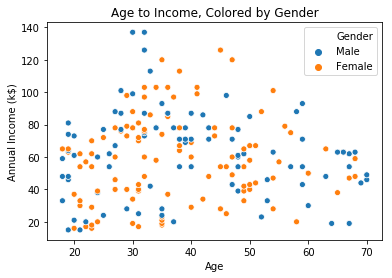

In [70]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=customers);
plt.title('Age to Income, Colored by Gender');

#### There is pretty much no correlation between age and income for either men or women in this data. The correlation matrix below confirms this.

In [65]:
customers.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


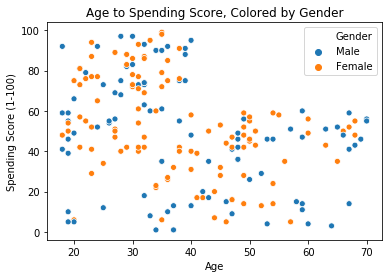

In [71]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Age to Spending Score, Colored by Gender');

#### The above plot shows the negative correlation between age and spending score. It's not a strong association, but the older the person, the worse their spending score.

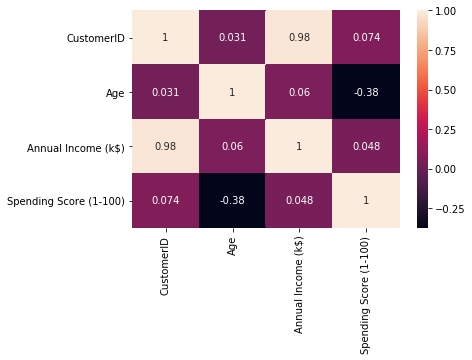

In [74]:
sns.heatmap(female_customers.corr(), annot=True);

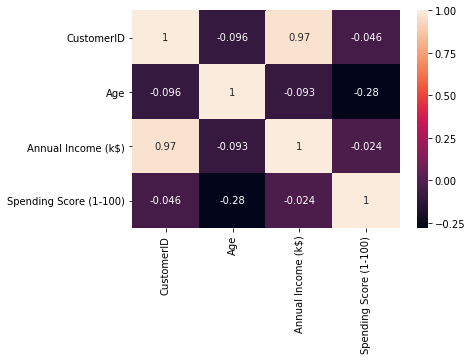

In [76]:
sns.heatmap(male_customers.corr(), annot=True);

#### Comparing men to women reveals that there is a slightly higher correlation between age and spending score for women.

C:\Users\riley\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


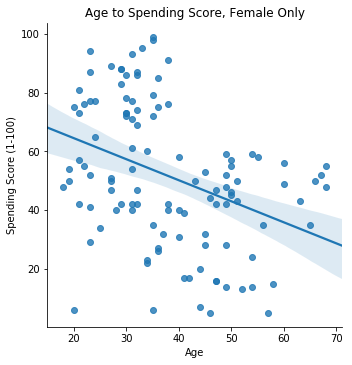

In [79]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Age to Spending Score, Female Only');

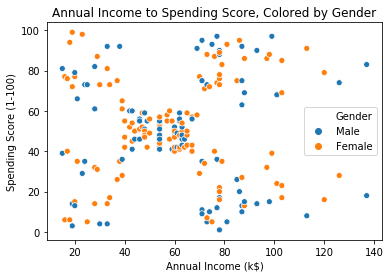

In [165]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Annual Income to Spending Score, Colored by Gender');

#### Annual Income and Spending Score have somewhat related means and standard deviations, which is why we see this strange shape. But there is very low if no correlation here.
  
#### There are 5 rough clusters here:
1. Low income, low spending score
2. Low income, high spending score
3. Mid income, medium spending score
4. High income, low spending score
5. High income, high spending score

Interestingly, there are no high income, medium spending score points.

## Interpretation and Actions

### Based on these data, the following hypotheses can be tested:

1. Marketing cheaper items to women to see if they purchase more frequently or more volume.

2. Thinking up new ways to target advertising, pricing, branding, etc. to the older women (older than early 40s) who have lower spending scores.

3. Figure out a way to gather more data to build a data set that has more features. The more features, the better understanding of what determines Spending Score. Once Spending Score is better understood, we can understand what factors will lead to increasing Spending Score, thus lead to greater profits.
